# Projet 03 du parcours data scientist de Openclassrooms

## Concevez une application au service de la santé publique

## Partie exploration

### Rappel des objectifs 

### Plan

### I-Idée d'application 

### II-Mise en place

In [28]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [29]:
conda install -c conda-forge ipympl

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\archi\anaconda3

  added / updated specs:
    - ipympl


The following packages will be downloaded:

Note: you may need to restart the kernel to use updated packages.
    package                    |            build




The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/win-64::anaconda-client==1.9.0=py39haa95532_0
  - defaults/win-64::anaconda-navigator==2.1.1=py39_0
  - defaults/noarch::anaconda-project==0.10.1=pyhd3eb1b0_0
  - defaults/win-64::conda==4.10.3=py39haa95532_0
  - defaults/win-64::conda-build==3.21.6=py39haa95532_0
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::conda-token==0.3.0=pyhd3eb1b0_0
  - defaults/noarch::cookiecutter==1.7.2=pyhd3eb1b0_0
  - defaults/noarch::jupyterlab==3.2.1=pyhd3eb1b0_1
  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/noarch::numpydoc==1.1.0=pyhd3eb1b0_1
  - defaults/noarch::sphinx==4.2.0=pyhd3eb1b0_1
  - defaults/win-64::spyder==5.1.5=py39haa95532_1
  - defaults/win-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39haa95532_0


==> WARNING: A newer version of conda exists. <==
  curre

    ---------------------------|-----------------
    certifi-2021.10.8          |   py39hcbf5309_2         145 KB  conda-forge
    ipympl-0.8.8               |     pyhd8ed1ab_0         344 KB  conda-forge
    openssl-1.1.1n             |       h8ffe710_0         5.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.2 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2021.11-py39_0
  ipympl             conda-forge/noarch::ipympl-0.8.8-pyhd8ed1ab_0
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39
  requests           conda-forge/noarch::requests-2.27.1-pyhd8ed1ab_0

The following packages will be UPDATED:

  certifi            pkgs/main::certifi-2021.10.8-py39haa9~ --> conda-forge::certifi-2021.10.8-py39hcbf5309_2
  openssl              pkgs/main::openssl-1.1.1l-h2bbff1b_0 --> conda-forge::openssl-1.1.1n-h8ffe710_0

The follow


    $ conda update -n base -c defaults conda



RemoveError: 'requests' is a dependency of conda and cannot be removed from
conda's operating environment.



In [31]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import des modules dont on a besoin pour l'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import plotly.express as px

from scipy.cluster.hierarchy import linkage, fcluster,dendrogram 

from sklearn import cluster

from sklearn import preprocessing 

from sklearn import metrics #librairie pour évaluation des partitions

from matplotlib.colors import ListedColormap

from matplotlib.collections import LineCollection

In [2]:
#Import et lecture du fichier
clean_df = pd.read_csv('datasets/clean_df_fr.csv', index_col = 0)

In [3]:
clean_df_c = clean_df.copy()

In [4]:
#Affichage de la forme du datafrime
print(f'clean_df contient {clean_df.shape[0]} lignes et {clean_df.shape[1]} colonnes')

clean_df contient 107584 lignes et 17 colonnes


In [5]:
#Observation du datafrime
clean_df.head(4)

code                                                url          creator  \
1    4530  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
2    4559  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
77  33640  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   
80  33688  http://world-fr.openfoodfacts.org/produit/0000...  usda-ndb-import   

       last_modified_datetime                    product_name  \
1   2017-03-09 14:32:37+00:00  Banana Chips Sweetened (Whole)   
2   2017-03-09 14:32:37+00:00                         Peanuts   
77  2017-03-09 09:07:05+00:00      Granola Cranberry And Acai   
80  2017-03-09 09:07:04+00:00             Peanuts, Mixed Nuts   

    ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
1                           0.0                                      0.0   
2                           0.0                                      0.0   
77                          0.0                                      0.0   
80                          0.0                                      0.0   

    energy_100g  fat_100g  saturated-fat_100g  trans-fat_100g  \
1        2243.0     28.57               28.57             0.0   
2        1941.0     17.86                0.00             0.0   
77       1824.0     10.91                0.91             0.0   
80       2389.0     42.86                7.14             0.0   

    cholesterol_100g  carbohydrates_100g  sugars_100g  salt_100g  
1              0.018               64.29        14.29    0.00000  
2              0.000               60.71        17.86    0.63500  
77             0.000               74.55        25.45    0.25400  
80             0.000               25.00        14.29    0.54356

In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107584 entries, 1 to 320768
Data columns (total 17 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     107584 non-null  int64  
 1   url                                      107584 non-null  object 
 2   creator                                  107584 non-null  object 
 3   last_modified_datetime                   107584 non-null  object 
 4   product_name                             107584 non-null  object 
 5   ingredients_from_palm_oil_n              107584 non-null  float64
 6   ingredients_that_may_be_from_palm_oil_n  107584 non-null  float64
 7   energy_100g                              107584 non-null  float64
 8   fat_100g                                 107584 non-null  float64
 9   saturated-fat_100g                       107584 non-null  float64
 10  trans-fat_100g                  

In [7]:
clean_df.dtypes

code                                         int64
url                                         object
creator                                     object
last_modified_datetime                      object
product_name                                object
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
trans-fat_100g                             float64
cholesterol_100g                           float64
carbohydrates_100g                         float64
sugars_100g                                float64
salt_100g                                  float64
dtype: object

In [5]:
clean_df['last_modified_datetime'] = pd.to_datetime(clean_df['last_modified_datetime'])

In [6]:
clean_df.dtypes

code                                                     int64
url                                                     object
creator                                                 object
last_modified_datetime                     datetime64[ns, UTC]
product_name                                            object
ingredients_from_palm_oil_n                            float64
ingredients_that_may_be_from_palm_oil_n                float64
energy_100g                                            float64
fat_100g                                               float64
saturated-fat_100g                                     float64
trans-fat_100g                                         float64
cholesterol_100g                                       float64
carbohydrates_100g                                     float64
sugars_100g                                            float64
salt_100g                                              float64
sodium_100g                                            

In [7]:
clean_df_c = clean_df.copy()

In [8]:
clean_df.isna().mean()*100

code                                       0.0
url                                        0.0
creator                                    0.0
last_modified_datetime                     0.0
product_name                               0.0
ingredients_from_palm_oil_n                0.0
ingredients_that_may_be_from_palm_oil_n    0.0
energy_100g                                0.0
fat_100g                                   0.0
saturated-fat_100g                         0.0
trans-fat_100g                             0.0
cholesterol_100g                           0.0
carbohydrates_100g                         0.0
sugars_100g                                0.0
salt_100g                                  0.0
sodium_100g                                0.0
nutrition-score-fr_100g                    0.0
dtype: float64

In [9]:
clean_df.duplicated(keep=False).sum()

0

In [10]:
clean_df.describe().transpose()

count          mean           std  \
code                                     107584.0  2.804459e+12  5.540478e+14   
ingredients_from_palm_oil_n              107584.0  2.044914e-04  1.429865e-02   
ingredients_that_may_be_from_palm_oil_n  107584.0  2.740184e-02  1.659065e-01   
energy_100g                              107584.0  1.247055e+03  6.894918e+02   
fat_100g                                 107584.0  1.363305e+01  1.330493e+01   
saturated-fat_100g                       107584.0  5.180988e+00  6.451136e+00   
trans-fat_100g                           107584.0  7.037331e-02  1.039947e+00   
cholesterol_100g                         107584.0  2.044412e-02  3.489764e-01   
carbohydrates_100g                       107584.0  3.727123e+01  2.852092e+01   
sugars_100g                              107584.0  1.820063e+01  2.086643e+01   
salt_100g                                107584.0  1.676839e+00  1.426354e+01   
sodium_100g                              107584.0  6.601726e-01  5.615563e+00   
nutrition-score-fr_100g                  107584.0  1.169284e+01  7.765845e+00   

                                            min           25%           50%  \
code                                     2220.0  4.126821e+10  7.488007e+10   
ingredients_from_palm_oil_n                 0.0  0.000000e+00  0.000000e+00   
ingredients_that_may_be_from_palm_oil_n     0.0  0.000000e+00  0.000000e+00   
energy_100g                                 0.0  6.400000e+02  1.343000e+03   
fat_100g                                    0.0  1.220000e+00  1.029000e+01   
saturated-fat_100g                          0.0  0.000000e+00  2.940000e+00   
trans-fat_100g                              0.0  0.000000e+00  0.000000e+00   
cholesterol_100g                            0.0  0.000000e+00  0.000000e+00   
carbohydrates_100g                          0.0  9.520000e+00  3.256000e+01   
sugars_100g                                 0.0  2.040000e+00  8.870000e+00   
salt_100g                                   0.0  2.108200e-01  8.864600e-01   
sodium_100g                                 0.0  8.300000e-02  3.490000e-01   
nutrition-score-fr_100g                     0.0  4.000000e+00  1.200000e+01   

                                                  75%           max  
code                                     7.215572e+11  1.285015e+17  
ingredients_from_palm_oil_n              0.000000e+00  1.000000e+00  
ingredients_that_may_be_from_palm_oil_n  0.000000e+00  3.000000e+00  
energy_100g                              1.795000e+03  2.498000e+03  
fat_100g                                 2.273000e+01  1.000000e+02  
saturated-fat_100g                       7.890000e+00  8.333000e+01  
trans-fat_100g                           0.000000e+00  1.732600e+02  
cholesterol_100g                         2.600000e-02  9.523800e+01  
carbohydrates_100g                       6.250000e+01  1.000000e+02  
sugars_100g                              3.000000e+01  1.000000e+02  
salt_100g                                1.633220e+00  2.452413e+03  
sodium_100g                              6.430000e-01  9.655170e+02  
nutrition-score-fr_100g                  1.800000e+01  3.600000e+01

<AxesSubplot:>

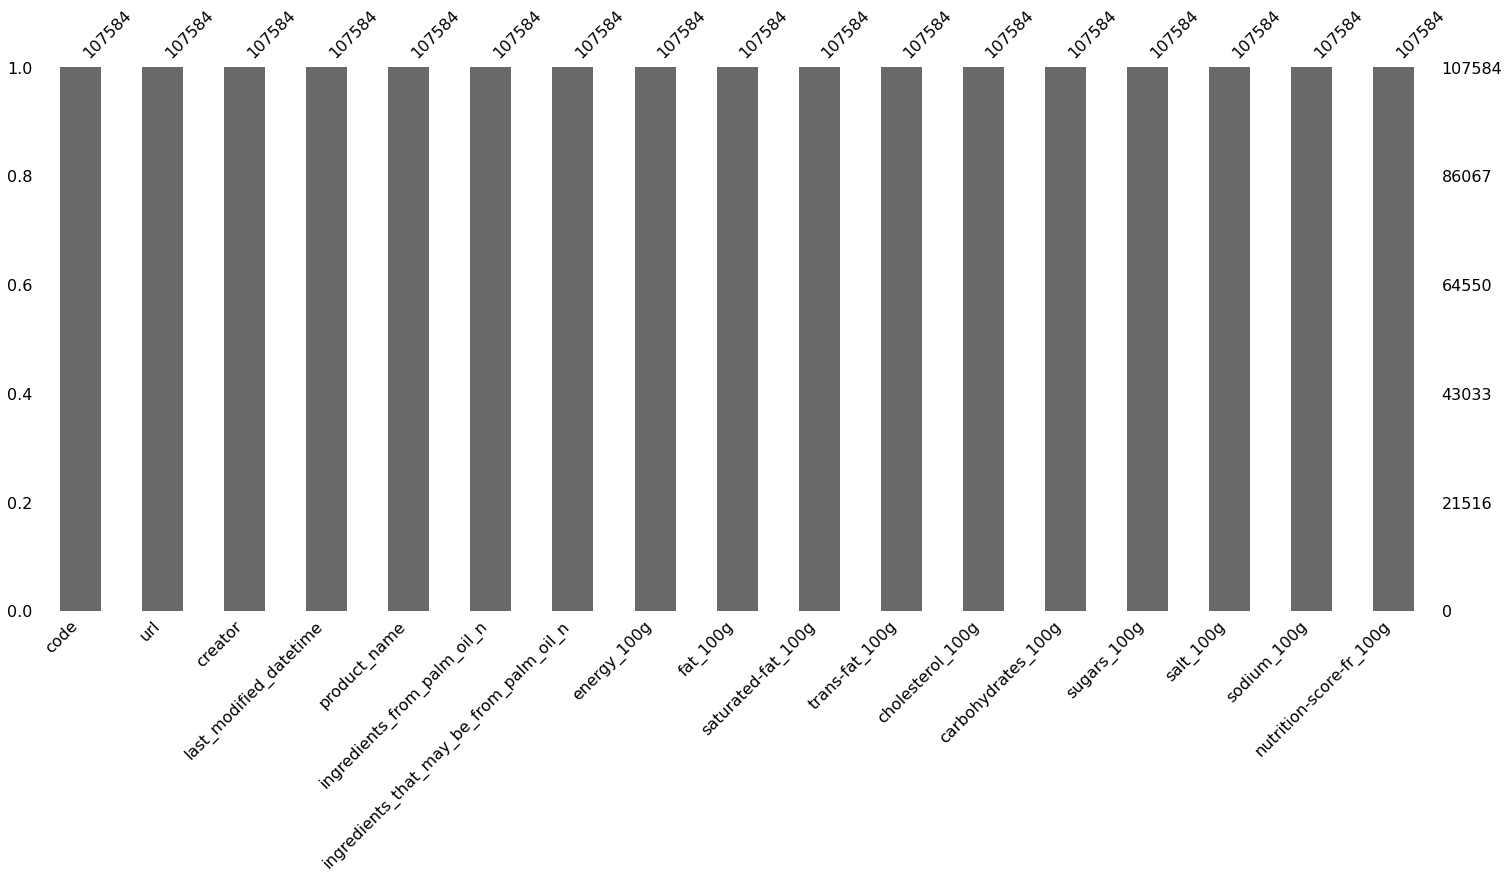

In [11]:
#Voir si le dataframe contient des valeurs nulles (Nan) 
msn.bar(clean_df)

### III-Rappel de l'analyse univariée 

In [8]:
indicateurs = ['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

Text(0.5, 1.0, 'features boxplot')

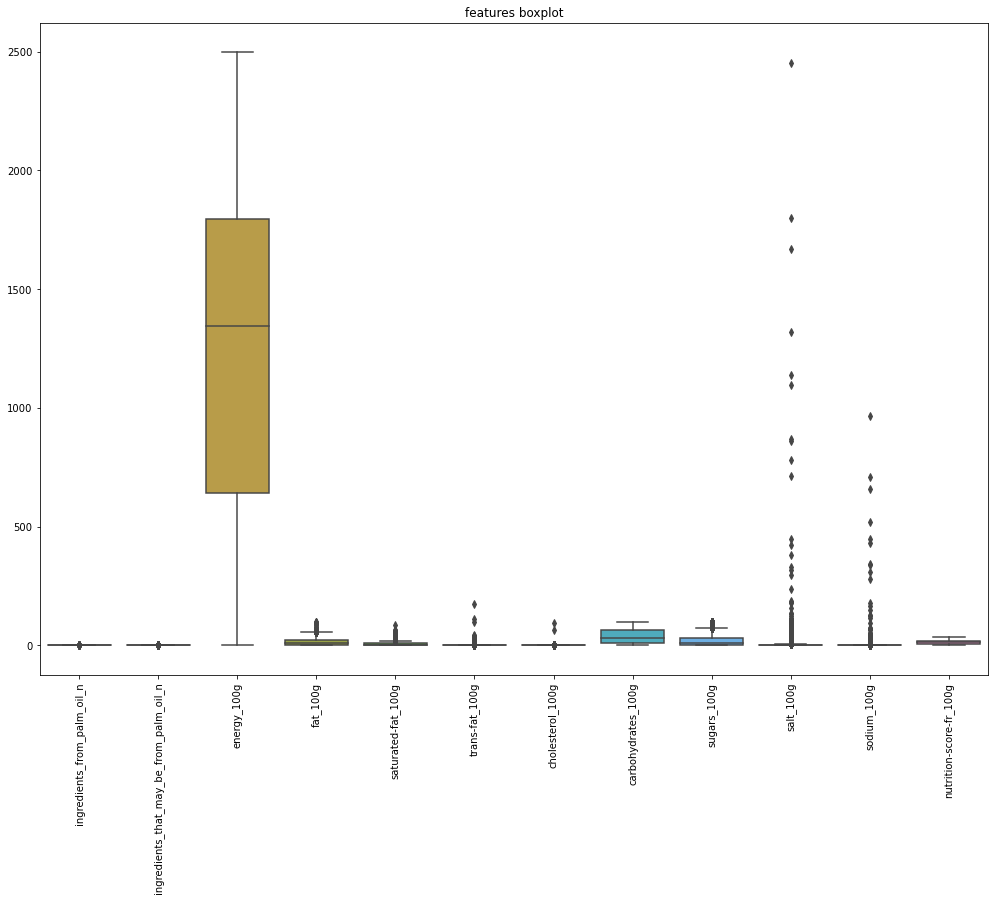

In [13]:
degrees = 90
fig = plt.figure(figsize=(17, 12))
ax = plt.axes()
plt.xticks(rotation=degrees)
sns.boxplot(data=clean_df[indicateurs]).set_title('features boxplot')

### IV-Analyse multivariée 

array([[<AxesSubplot:xlabel='ingredients_from_palm_oil_n', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='ingredients_that_may_be_from_palm_oil_n', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='energy_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='fat_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='saturated-fat_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='trans-fat_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='cholesterol_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='carbohydrates_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='sugars_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='salt_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='sodium_100g', ylabel='ingredients_from_palm_oil_n'>,
        <AxesSubplot:xlabel='nutritio

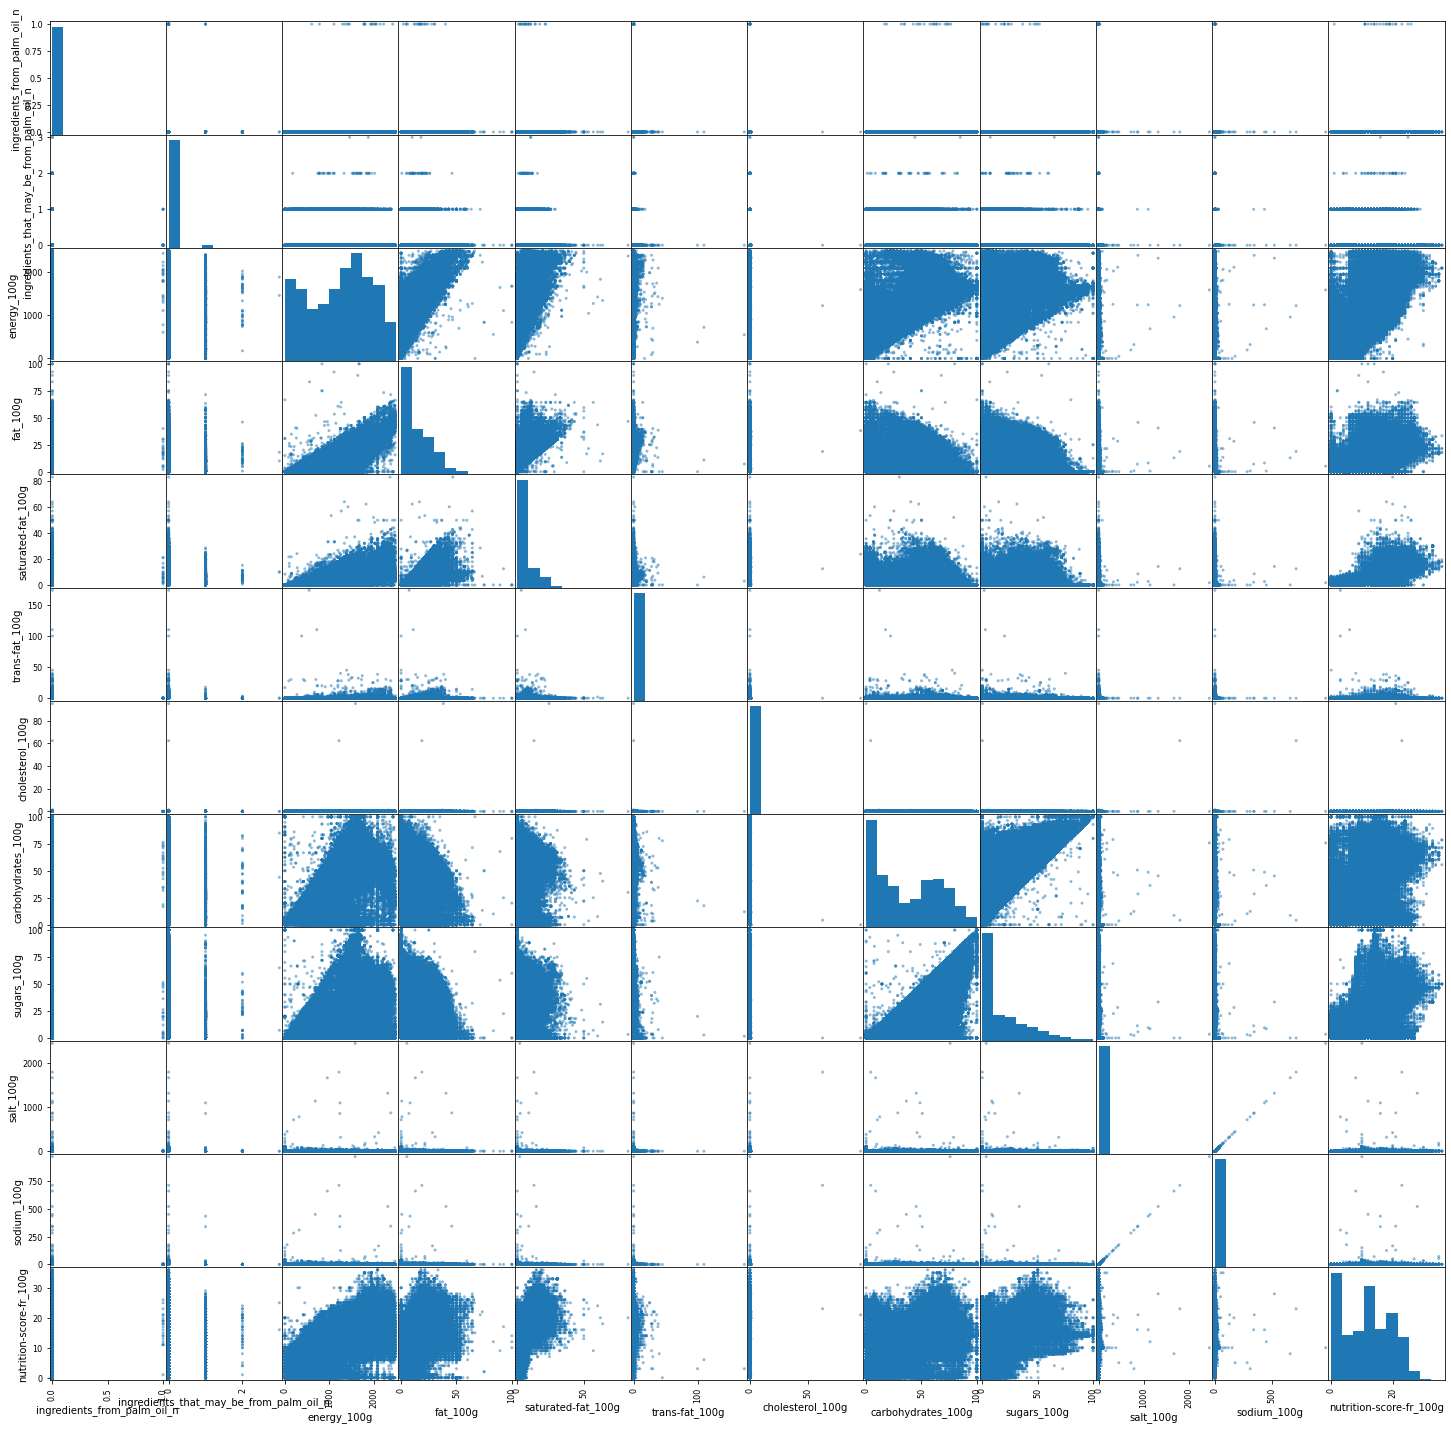

In [14]:
#Présence potentiel d'une corrélation entre les différentes variables
scatter_matrix(clean_df[indicateurs],figsize=(25,25))

<AxesSubplot:>

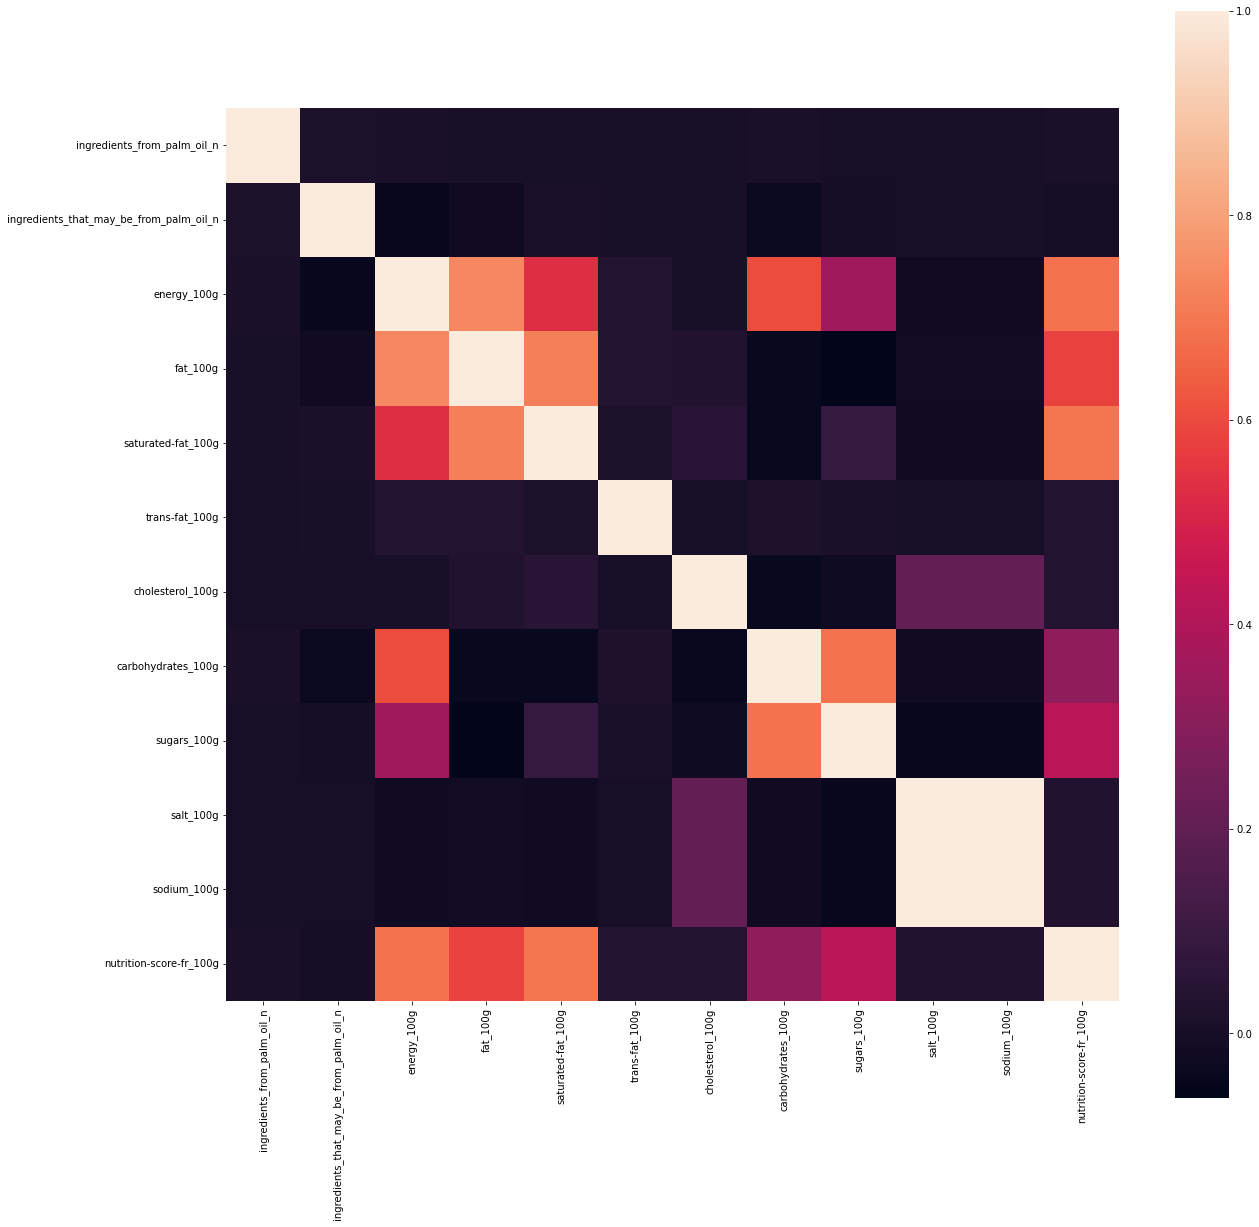

In [16]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(clean_df[indicateurs].corr(),annot = False,square=True)

### V-ACP (Analyse en composante principale)  

In [9]:
#On travail avec la version copy
#Séparer les fonctionnalités
clean_df_c.replace([np.inf, -np.inf], 0, inplace=True)
x = clean_df_c[indicateurs].values

In [10]:
#Séparer la cible
y = clean_df_c['nutrition-score-fr_100g'].values
hue = pd.DataFrame(y)

In [11]:
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)
X_scaled = np.nan_to_num(X_scaled, copy=False, nan=0.0, posinf=0.0, neginf=0.0)

In [12]:
pca = PCA(n_components=10)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

Text(0, 0.5, 'Principal component')

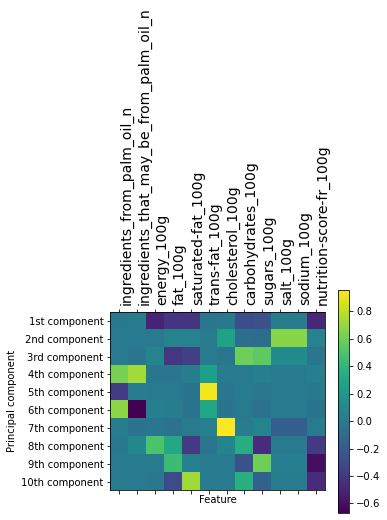

In [13]:
plt.matshow(pca.components_,cmap='viridis');
plt.yticks([0,1,2,3,4,5,6,7,8,9], ['1st component', '2nd component','3rd component','4th component', '5th component','6th component','7th component','8th component','9th component','10th component']);
plt.colorbar();
plt.xticks(range(len(indicateurs)),indicateurs, rotation = 90, fontsize=14, ha = 'left');
plt.xlabel('Feature');
plt.ylabel('Principal component')

In [14]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

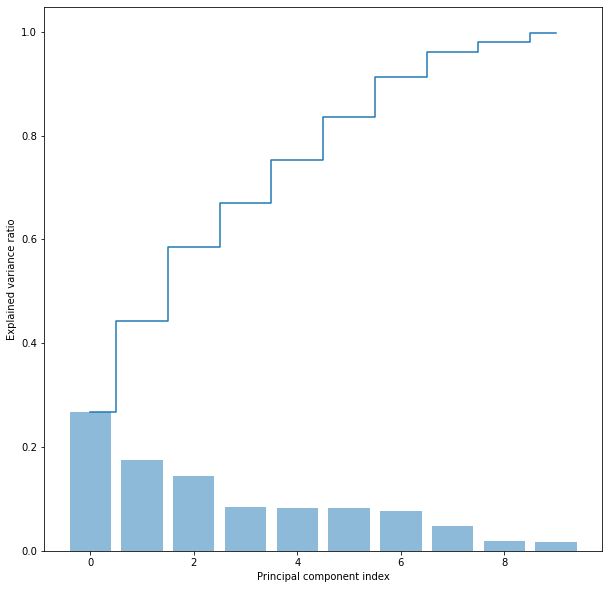

In [15]:
#Pourcentage d'inertie
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

fig = plt.figure(figsize=(10,10))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()

C:\Users\archi\AppData\Local\Temp/ipykernel_15708/2264661444.py:11: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().

No handles with labels found to put in legend.


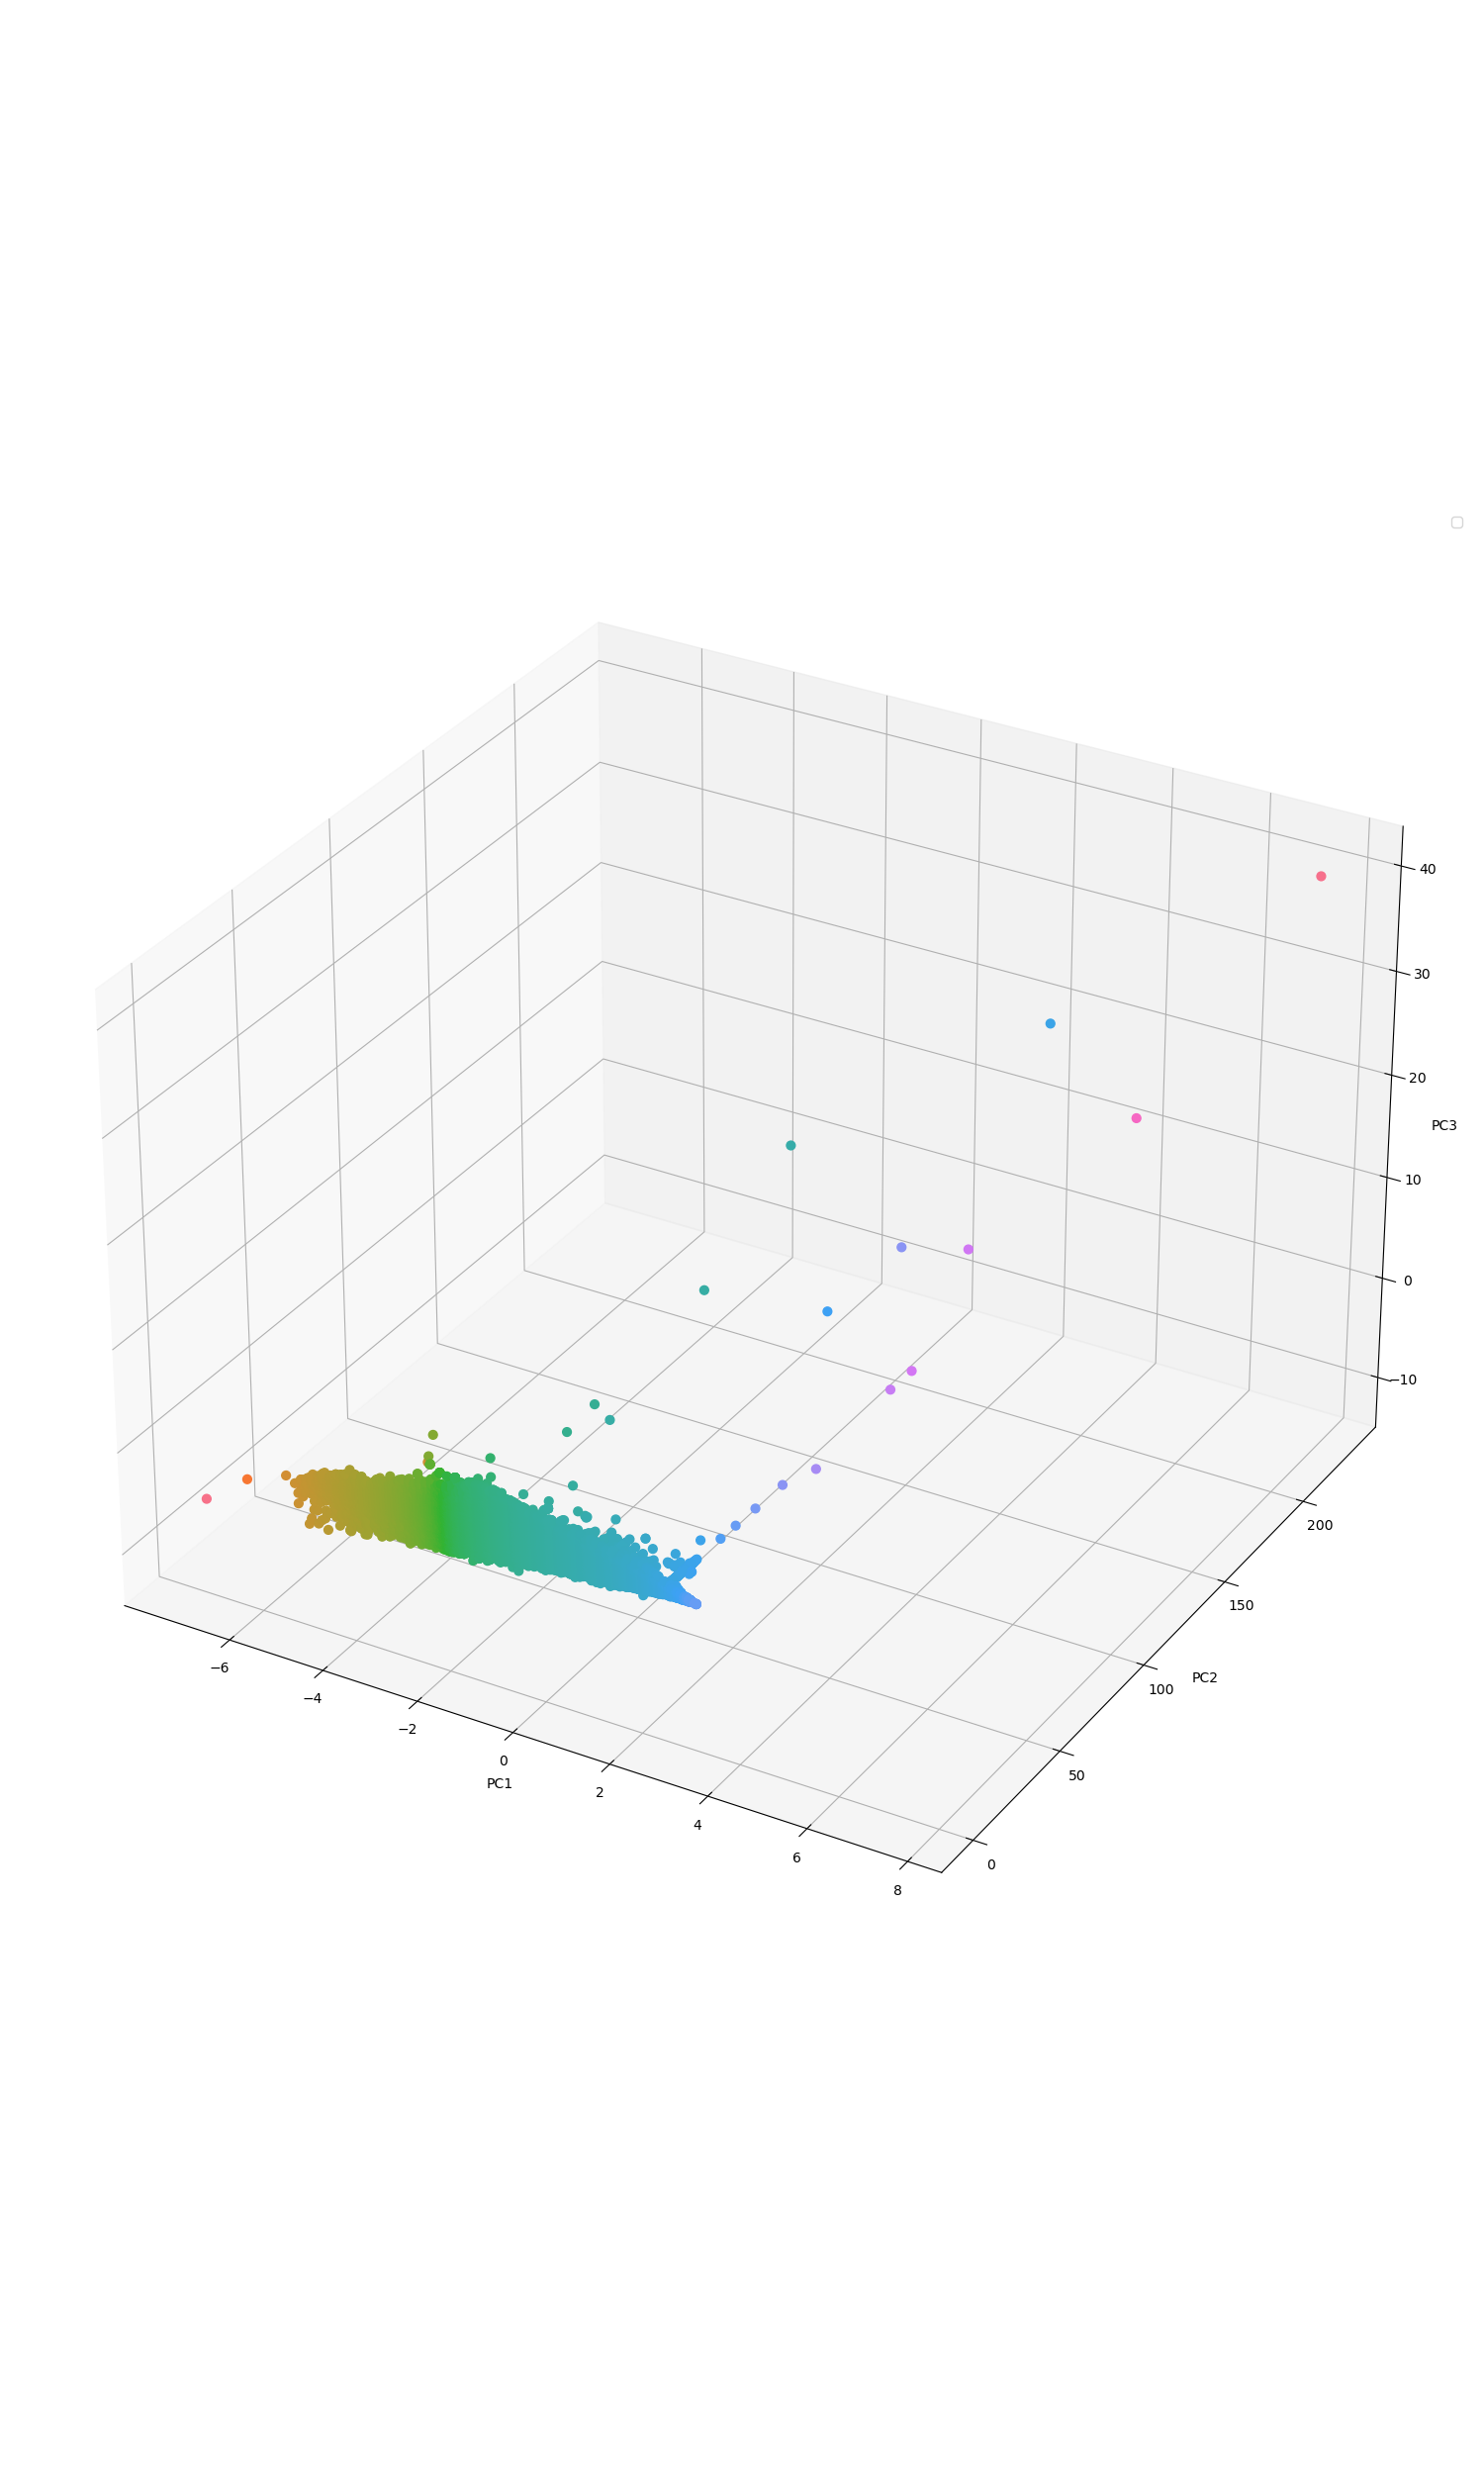

In [16]:
x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]
%matplotlib widget
plt.rcParams["figure.figsize"] = [15, 25]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax = fig.gca(projection='3d')
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.legend()

plt.show()

In [1]:
#Affichage du cercle des corrélations des deux premières composantes
#pcs = pca.
#display_circles(pcs, 3, pca, [(0,1),(2,3),(4,5)], labels = np.array(acp_vars))

### VI-HCPC (Classification Hiérarchique sur Composantes Principales)

In [17]:
def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
    plt.savefig('datasets/Dendrogram.png')
    plt.show()

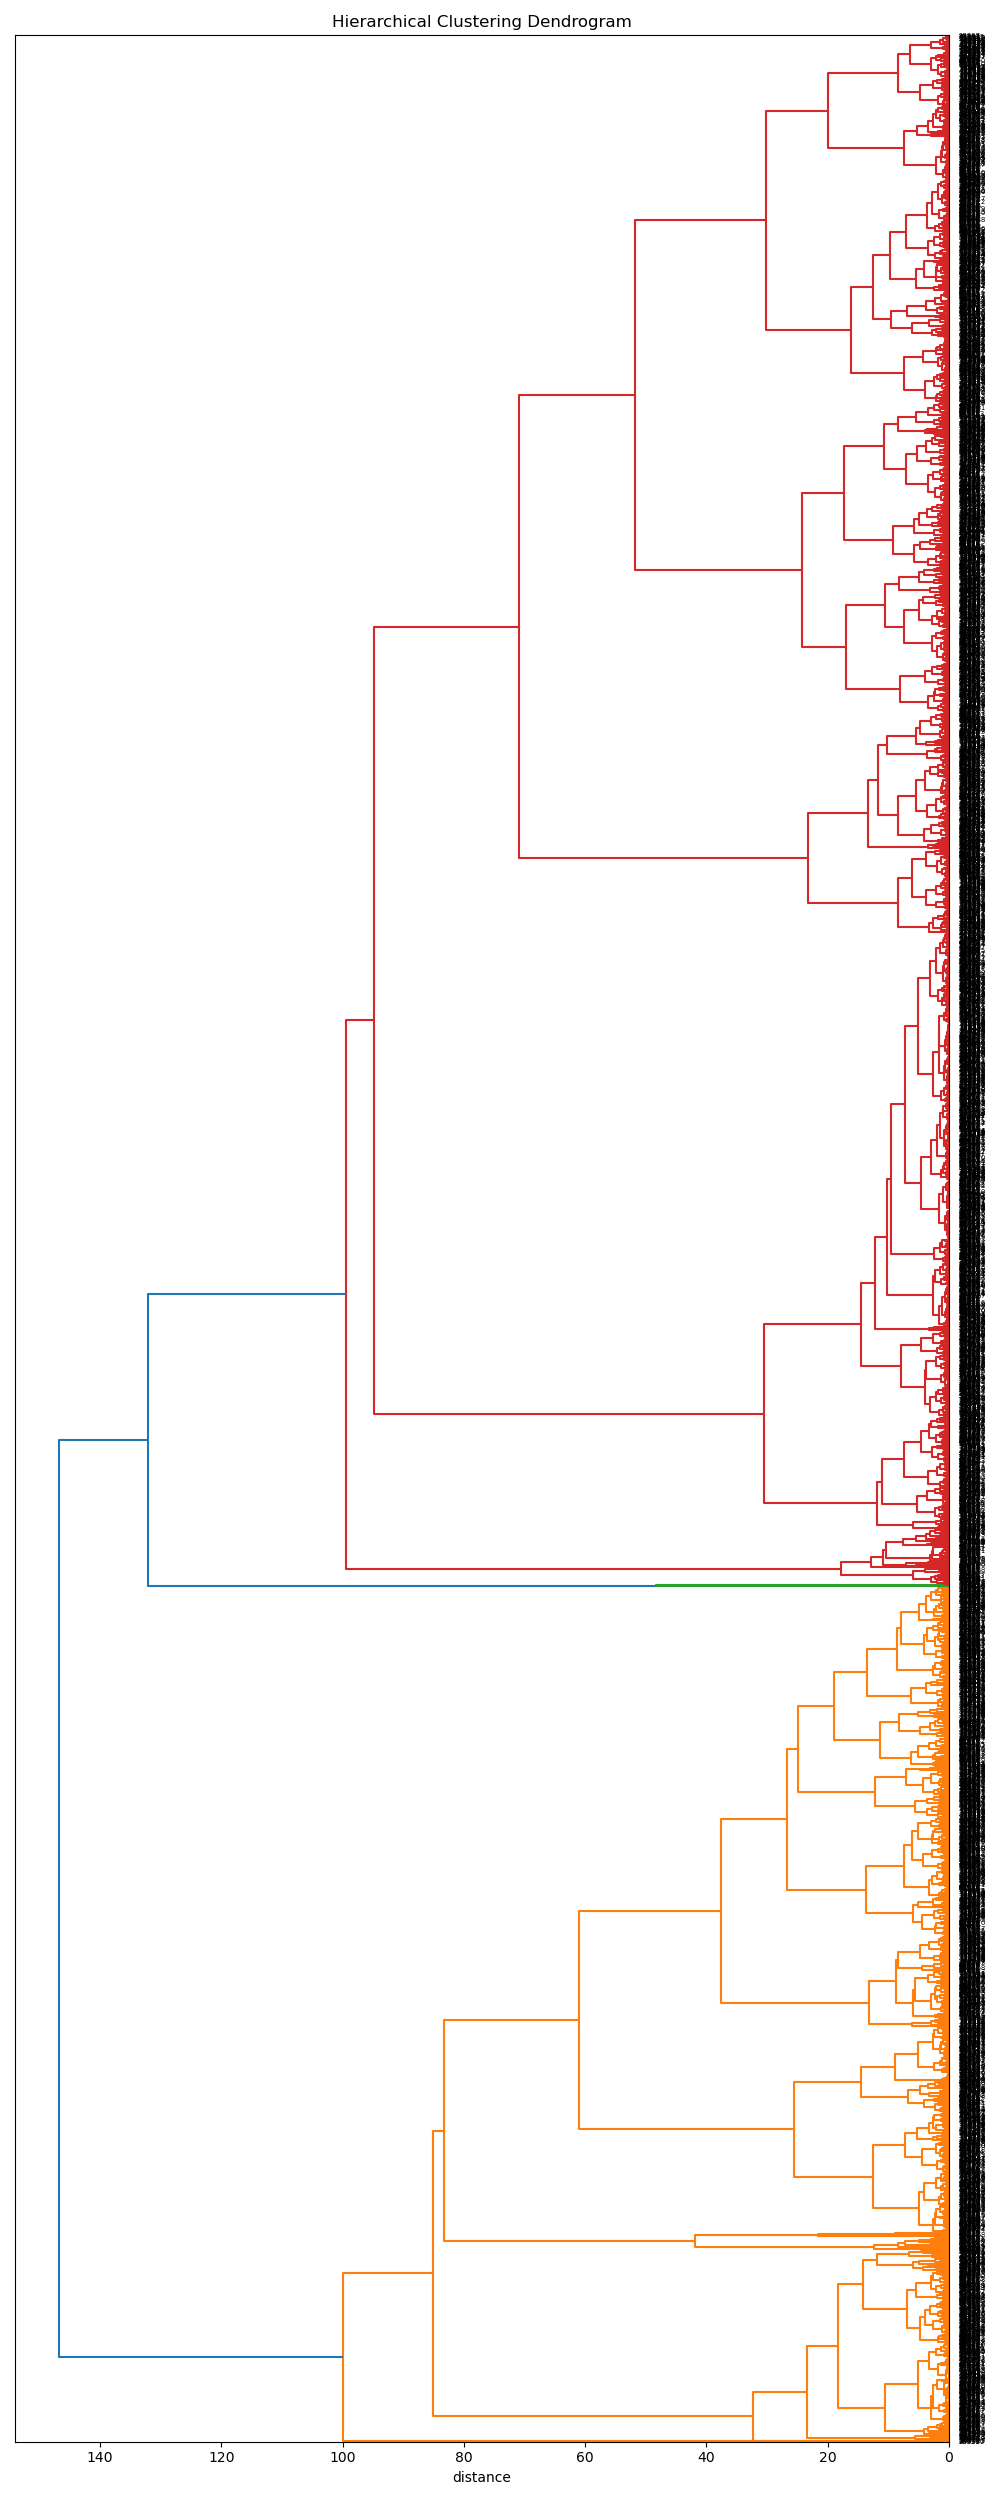

In [18]:
#sample = clean_df_c[indicateurs] #pas assez d'espace
sample = clean_df_c[indicateurs].sample(n = 5000)

# préparation des données pour le clustering
X = sample.values
names = sample.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme (se trouve dans datasets)
plot_dendrogram(Z, names);

In [19]:
clusters = fcluster(Z,t=40,criterion='distance')

idg = np.argsort(clusters)

#affichage des observations et leurs groupes
clusters = pd.DataFrame(sample.index[idg],clusters[idg])
clusters.to_csv('PCA_clusters.csv',sep=',', index = True)

In [20]:
PCA_clusters_df = pd.read_csv('datasets/PCA_clusters.csv', index_col = 0)

In [21]:
PCA_clusters_df.head(4)

0
1  2068
1  1558
1  1560
1   797

### VII-K-means

In [22]:
#k-means sur les données centrées et réduites
kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(sample)

#index triés des groupes
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes
groups = pd.DataFrame(sample.index[idk],kmeans.labels_[idk])
groups.to_csv('datasets/Kmeans_clusters.csv',sep=',', index = True)

In [23]:
Kmeans_clusters_df = pd.read_csv('datasets/Kmeans_clusters.csv', index_col = 0)

In [24]:
Kmeans_clusters_df.head(4)

0
0   79157
0   92507
0   26274
0  143498

In [46]:
#pd.crosstab(clusters.index,kmeans.labels_)

ValueError: All arrays must be of the same length

In [30]:
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(sample)
    res[k] = metrics.silhouette_score(sample,km.labels_)
    print(res) #32 min de calculs

[0.62837865 1.         2.         3.         4.         5.
 6.         7.         8.        ]
[0.62837865 0.56649343 2.         3.         4.         5.
 6.         7.         8.        ]
[0.62837865 0.56649343 0.58734853 3.         4.         5.
 6.         7.         8.        ]
[0.62837865 0.56649343 0.58734853 0.55447129 4.         5.
 6.         7.         8.        ]
[0.62837865 0.56649343 0.58734853 0.55447129 0.52695998 5.
 6.         7.         8.        ]
[0.62837865 0.56649343 0.58734853 0.55447129 0.52695998 0.52600845
 6.         7.         8.        ]
[0.62837865 0.56649343 0.58734853 0.55447129 0.52695998 0.52600845
 0.52034344 7.         8.        ]
[0.62837865 0.56649343 0.58734853 0.55447129 0.52695998 0.52600845
 0.52034344 0.50753736 8.        ]
[0.62837865 0.56649343 0.58734853 0.55447129 0.52695998 0.52600845
 0.52034344 0.50753736 0.49771014]


[0.6277983 1.        2.        3.        4.        5.        6.
 7.        8.       ]
[0.6277983  0.56788791 2.         3.         4.         5.
 6.         7.         8.        ]
[0.6277983  0.56788791 0.58693414 3.         4.         5.
 6.         7.         8.        ]
[0.6277983  0.56788791 0.58693414 0.55658198 4.         5.
 6.         7.         8.        ]
[0.6277983  0.56788791 0.58693414 0.55658198 0.53875607 5.
 6.         7.         8.        ]
[0.6277983  0.56788791 0.58693414 0.55658198 0.53875607 0.52783788
 6.         7.         8.        ]
[0.6277983  0.56788791 0.58693414 0.55658198 0.53875607 0.52783788
 0.5208589  7.         8.        ]
[0.6277983  0.56788791 0.58693414 0.55658198 0.53875607 0.52783788
 0.5208589  0.50645569 8.        ]
[0.6277983  0.56788791 0.58693414 0.55658198 0.53875607 0.52783788
 0.5208589  0.50645569 0.50093961]


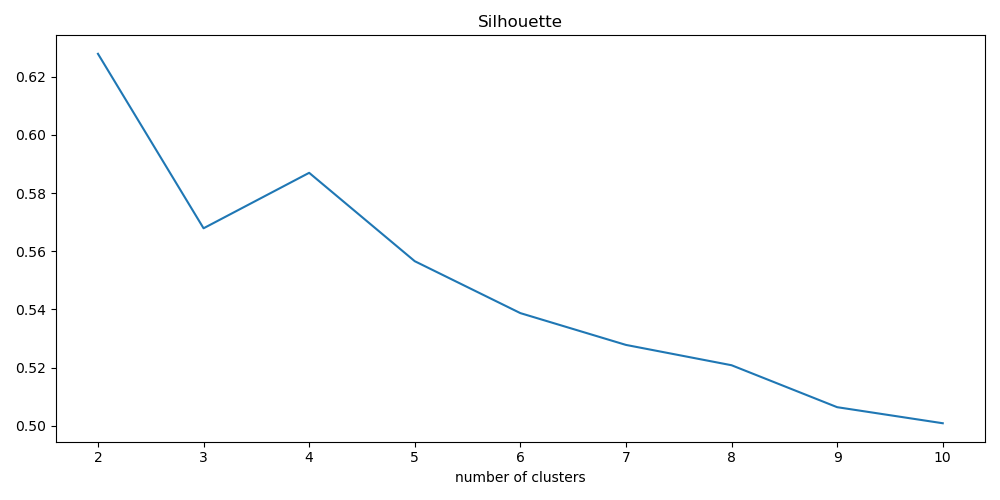

In [25]:
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(sample)
    res[k] = metrics.silhouette_score(sample,km.labels_)
    print(res) #32 min de calcul

#graphique
fig = plt.figure(figsize=(10,5))
plt.title("Silhouette")
plt.xlabel("number of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [26]:
#moyenne par variable
m = sample.mean()

#TSS
TSS = sample.shape[0]*sample.var(ddof=0)
print(TSS)

ingredients_from_palm_oil_n                1.999200e+00
ingredients_that_may_be_from_palm_oil_n    1.201678e+02
energy_100g                                2.406731e+09
fat_100g                                   9.105198e+05
saturated-fat_100g                         2.177971e+05
trans-fat_100g                             1.938762e+03
cholesterol_100g                           5.912399e+00
carbohydrates_100g                         3.967650e+06
sugars_100g                                2.141584e+06
salt_100g                                  7.385039e+06
sodium_100g                                1.144683e+06
nutrition-score-fr_100g                    3.073621e+05
dtype: float64


In [27]:
#data.frame conditionnellement aux groupes
gb = sample.groupby(kmeans.labels_)

#effectifs conditionnels
nk = gb.size()
print(nk)

0    1324
1     690
2     940
3    1085
4     961
dtype: int64


   ingredients_from_palm_oil_n  ingredients_that_may_be_from_palm_oil_n  \
0                     0.000000                                 0.020393   
1                     0.000000                                 0.044928   
2                     0.000000                                 0.040426   
3                     0.001843                                 0.005530   
4                     0.000000                                 0.017690   

   energy_100g   fat_100g  saturated-fat_100g  trans-fat_100g  \
0  1641.799094  14.695000            6.384532        0.071563   
1   701.015942   7.138797            2.903261        0.018710   
2  1172.582979  11.171713            4.569681        0.075734   
3  2153.319816  31.298645           10.913705        0.110772   
4   225.935068   1.093736            0.396634        0.000853   

   cholesterol_100g  carbohydrates_100g  sugars_100g  salt_100g  sodium_100g  \
0          0.024923           56.537915    27.149041   3.269406     1.287170  

<AxesSubplot:>

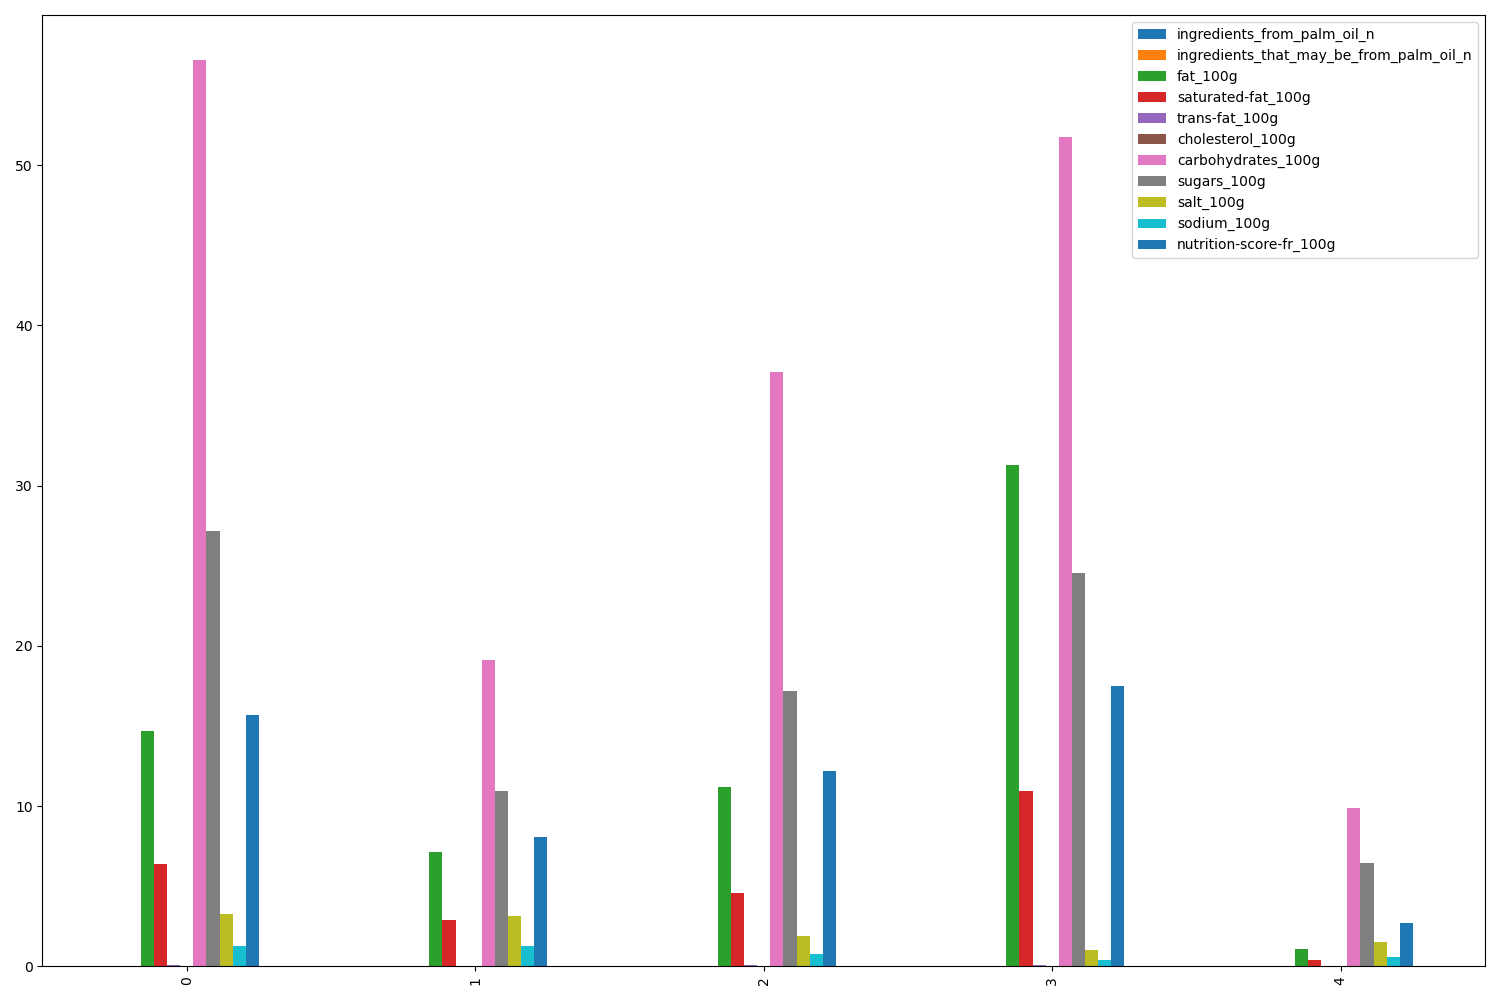

In [28]:
#moyennes conditionnelles
mk = gb.mean()
print(mk)

mk_no_energy = mk.drop("energy_100g",axis=1)
mk.plot.bar(y=mk_no_energy.columns,figsize=(15,10))

<AxesSubplot:>

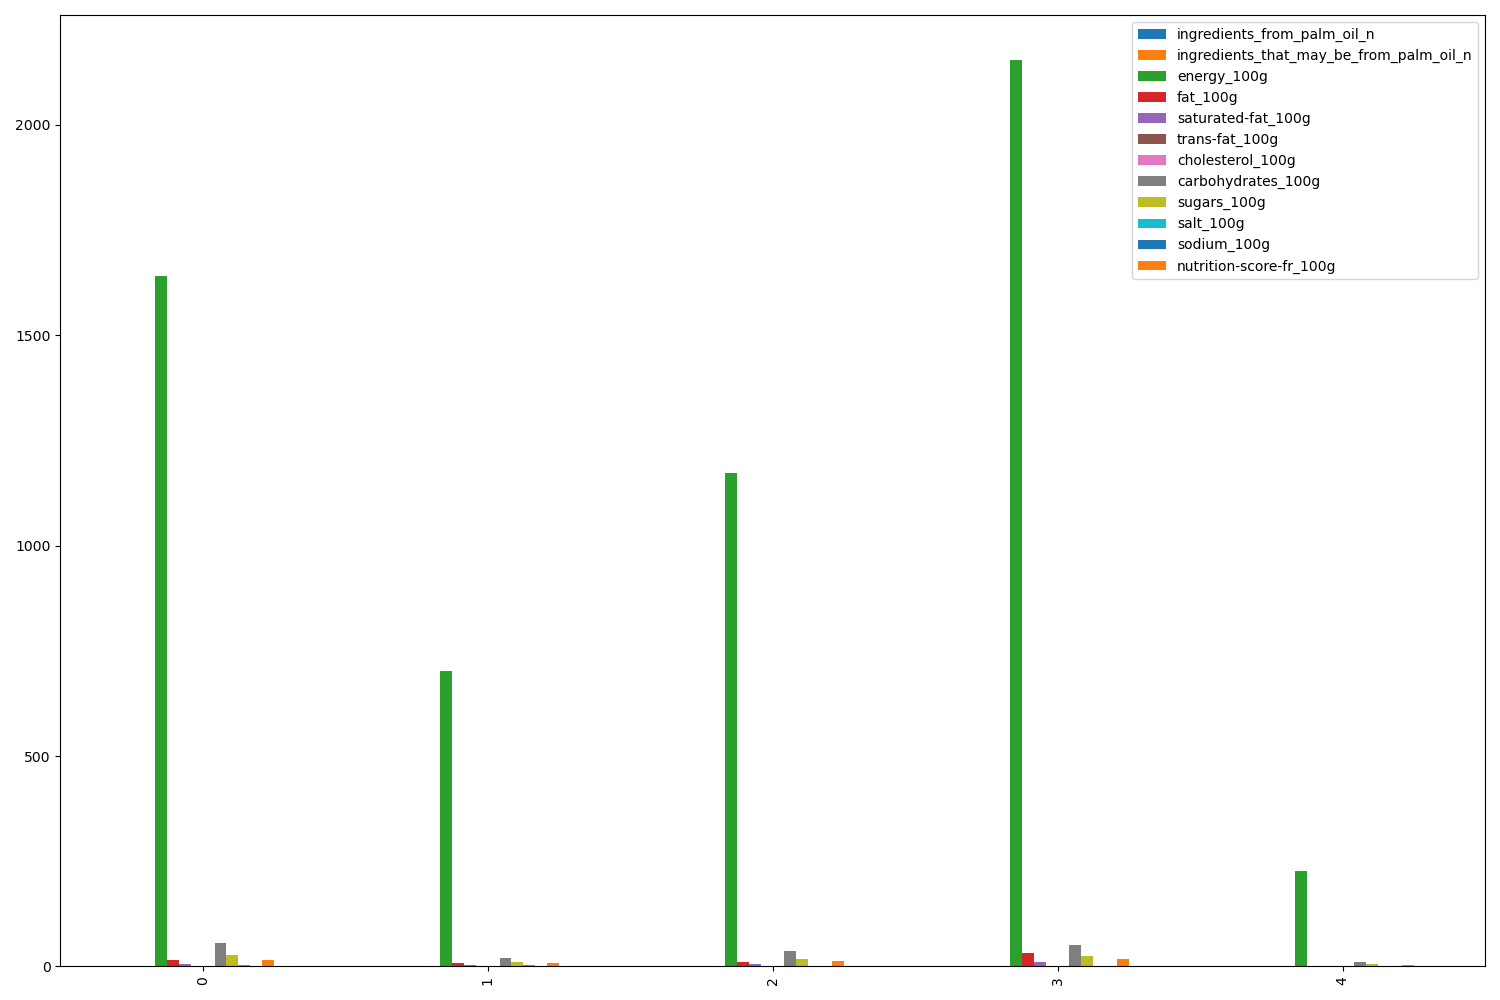

In [29]:
mk.plot.bar(y=mk.columns,figsize=(15,10))

In [30]:
#pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2

#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)

ingredients_from_palm_oil_n                2.886636e-03
ingredients_that_may_be_from_palm_oil_n    9.812362e-01
energy_100g                                2.309188e+09
fat_100g                                   5.253932e+05
saturated-fat_100g                         6.327493e+04
trans-fat_100g                             7.744934e+00
cholesterol_100g                           4.234467e-01
carbohydrates_100g                         1.666086e+06
sugars_100g                                3.184685e+05
salt_100g                                  4.188975e+03
sodium_100g                                6.492968e+02
nutrition-score-fr_100g                    1.441309e+05
dtype: float64


In [31]:
BSS_ = BSS[1:]
BSS_

ingredients_that_may_be_from_palm_oil_n    9.812362e-01
energy_100g                                2.309188e+09
fat_100g                                   5.253932e+05
saturated-fat_100g                         6.327493e+04
trans-fat_100g                             7.744934e+00
cholesterol_100g                           4.234467e-01
carbohydrates_100g                         1.666086e+06
sugars_100g                                3.184685e+05
salt_100g                                  4.188975e+03
sodium_100g                                6.492968e+02
nutrition-score-fr_100g                    1.441309e+05
dtype: float64

<AxesSubplot:>

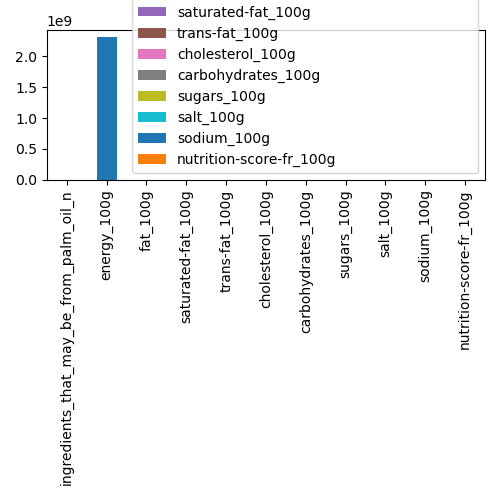

In [32]:
BSS_.plot.bar(x = BSS_.index,y = BSS_, figsize=(5, 5))

In [33]:
#carré du rapport de corrélation, variance expliquée par l'appartenance aux groupes pour chaque variable
R2 = BSS/TSS
print(R2)

ingredients_from_palm_oil_n                0.001444
ingredients_that_may_be_from_palm_oil_n    0.008166
energy_100g                                0.959471
fat_100g                                   0.577026
saturated-fat_100g                         0.290522
trans-fat_100g                             0.003995
cholesterol_100g                           0.071620
carbohydrates_100g                         0.419918
sugars_100g                                0.148707
salt_100g                                  0.000567
sodium_100g                                0.000567
nutrition-score-fr_100g                    0.468929
dtype: float64


<AxesSubplot:>

C:\Users\archi\anaconda3\lib\site-packages\ipympl\backend_nbagg.py:336: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 



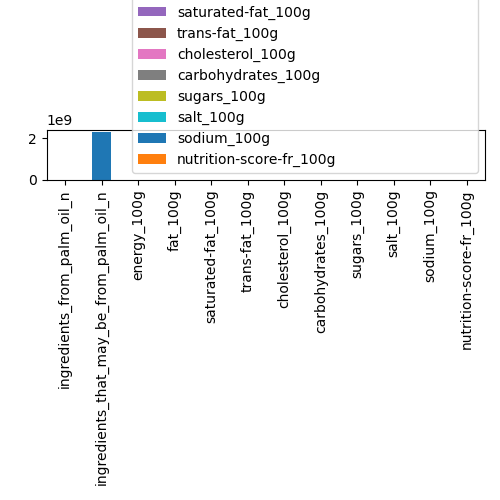

In [34]:
R2.plot.bar(x = R2.index,y = R2, figsize=(5, 5))

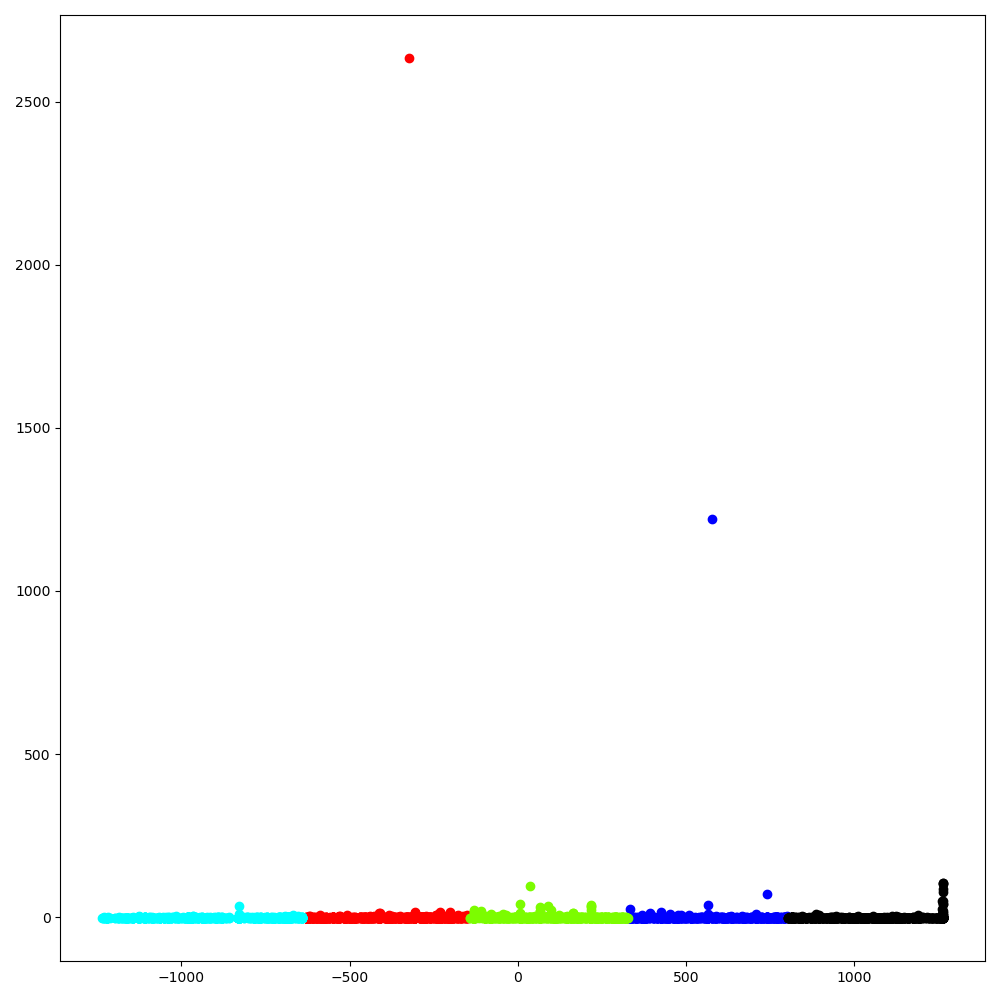

In [35]:
import matplotlib
matplotlib.rcParams['backend'] = "Qt4Agg"

#projeter dans le plan factoriel avec un code couleur différent selon le groupe
ACP = PCA(n_components=3).fit_transform(sample)

fig = plt.figure(figsize=(10,10))

for couleur,k in zip(['red','blue','lawngreen','aqua','black','yellow','brown'],[0,1,2,3,4,5,6]):    
    plt.scatter(ACP[kmeans.labels_==k,0],ACP[kmeans.labels_==k,1],c=couleur)
plt.show() 

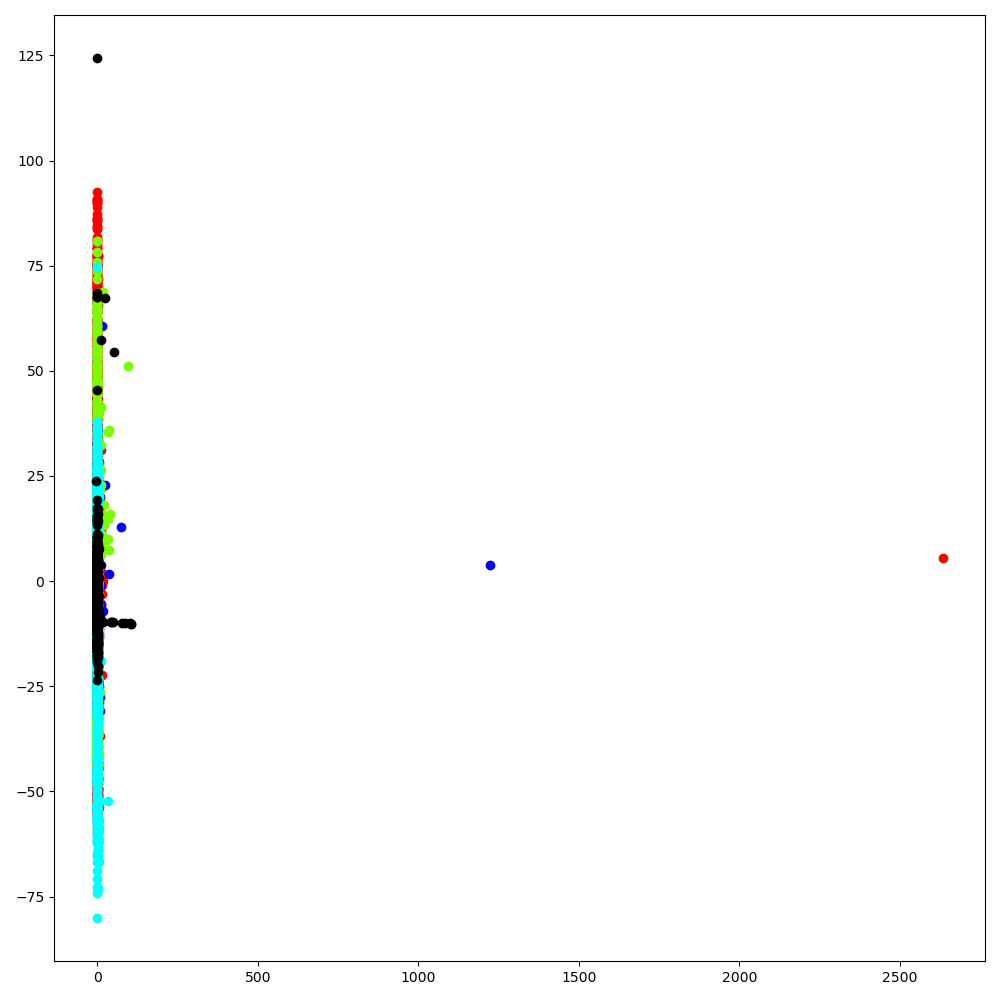

In [36]:
fig = plt.figure(figsize=(10,10))
for couleur,k in zip(['red','blue','lawngreen','aqua','black','yellow','brown'],[0,1,2,3,4,5,6]):    
    plt.scatter(ACP[kmeans.labels_==k,1],ACP[kmeans.labels_==k,2],c=couleur)
plt.show() 

### VIII-Idée d'application 

### IX-Conclusion